# Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.# 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Visualisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


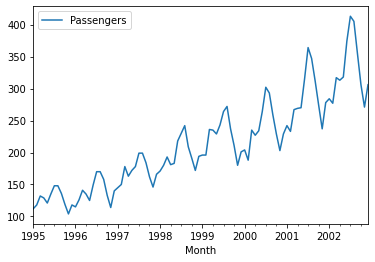

In [3]:
df = pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0)
df.plot()
plt.show()

In [4]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [6]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
df.value_counts()

Passengers
229           3
237           2
172           2
178           2
180           2
             ..
181           1
171           1
166           1
163           1
413           1
Length: 80, dtype: int64

In [8]:
df.value_counts().sum()

96

In [9]:
df.isnull()

,Passengers
Month,
1995-01-01,False
1995-02-01,False
1995-03-01,False
1995-04-01,False
1995-05-01,False
...,...
2002-08-01,False
2002-09-01,False
2002-10-01,False


In [10]:
df.isnull().sum()

Passengers    0
dtype: int64

In [11]:
#No Null Values

In [12]:
df.index.year


Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [13]:
df.shape

(96, 1)

In [14]:
df.duplicated().sum()

16

In [15]:
df[df.duplicated()].shape

(16, 1)

In [16]:
df[df.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [17]:
df.drop_duplicates(inplace=True) #removing duplicated values

In [18]:
df.duplicated().sum()

0

In [19]:
new_df = df.copy()

In [20]:
# making a copy of the original data so that any changes done to coppied data does not reflect to original data


In [21]:
new_df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 1995-01-01 to 2002-11-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  80 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [23]:
new_df.isnull().sum()

Passengers    0
dtype: int64

visualization

<AxesSubplot: xlabel='Month'>

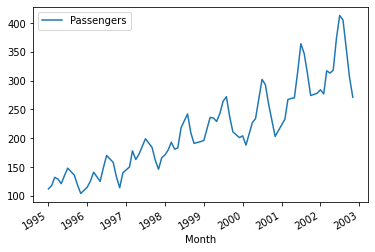

In [24]:
new_df.plot() #line plot

In [25]:
#trend is upward

array([[<AxesSubplot: title={'center': 'Passengers'}>]], dtype=object)

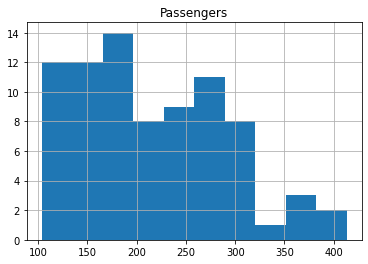

In [26]:
new_df.hist() #histogram

<AxesSubplot: ylabel='Density'>

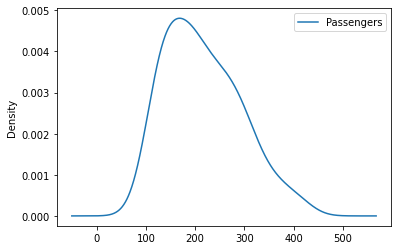

In [27]:
new_df.plot(kind='kde') #distplot

In [28]:
from pandas.plotting import lag_plot

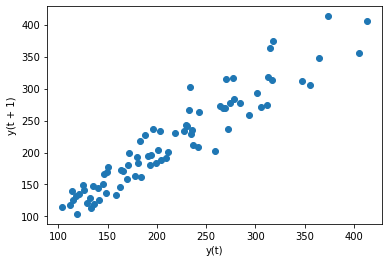

In [29]:
lag_plot(new_df)
plt.show()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

In [31]:
from matplotlib import pyplot

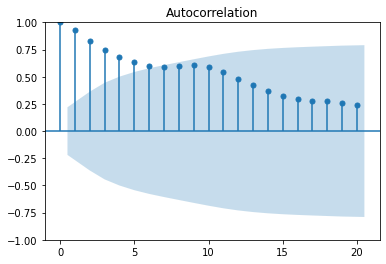

In [32]:

plot_acf(new_df) #autocorrelation plot
plt.show()

In [33]:
new_df["Passengers"].values.min()

104

In [34]:
new_df["Passengers"].values.max()

413

# Sampling & Transformation

In [35]:
upsampled = new_df.resample('M').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31         NaN
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31         NaN
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30         NaN
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31         NaN
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30         NaN
1997-07-31       199.0
1997-08-31         NaN


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       142.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       109.5
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30       133.0
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31       164.0
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30       185.5
1997-07-31       199.0
1997-08-31       191.5


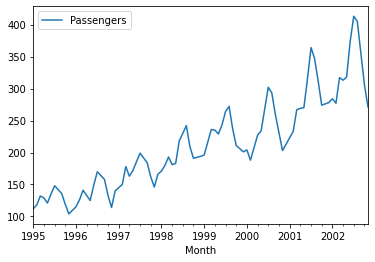

In [36]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
plt.show()

In [37]:
# interplation was done for nan values 
# in which we get after doing upsampling by month


Transformation

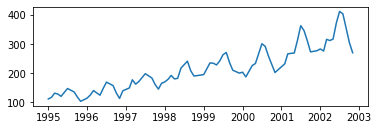

In [38]:
# line plot
pyplot.subplot(211)
pyplot.plot(new_df)
plt.show()

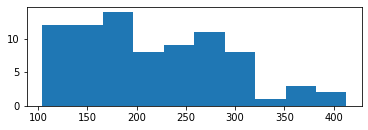

In [39]:
# histogram
pyplot.subplot(212)
pyplot.hist(new_df)
plt.show()

Square Root Transform

In [40]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt


In [41]:
dataframe = DataFrame(new_df.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])

In [42]:
dataframe.min(),dataframe.max()

(passengers    10.198039
 dtype: float64,
 passengers    20.322401
 dtype: float64)

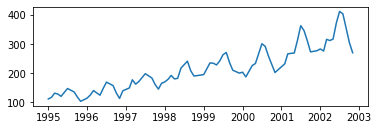

In [43]:
# line plot
plt.subplot(211)
plt.plot(new_df['Passengers'])
plt.show()

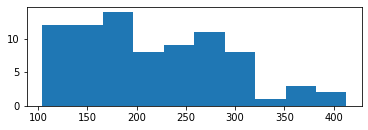

In [44]:
# histogram
plt.subplot(212)
plt.hist(new_df['Passengers'])
plt.show()

Log Transform

In [45]:
#for log transformation
from numpy import log

In [46]:
dataframe = DataFrame(new_df.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])


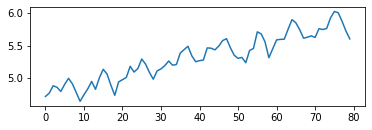

In [47]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
pyplot.show()

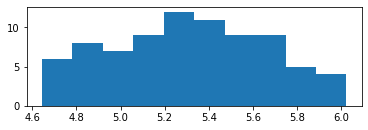

In [48]:
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

# Forecasting Model Based Methods

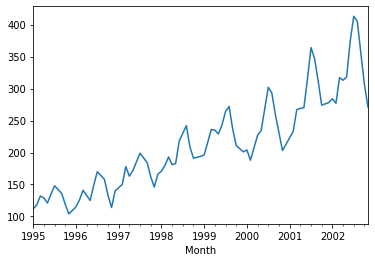

In [49]:
interpolated.Passengers.plot()
plt.show()

In [50]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [51]:
interpolated.reset_index(inplace=True)


In [52]:
interpolated['t'] = 1


In [53]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,1
2,1995-03-31,132.0,1
3,1995-04-30,129.0,1
4,1995-05-31,121.0,1
...,...,...,...
90,2002-07-31,413.0,1
91,2002-08-31,405.0,1
92,2002-09-30,355.0,1
93,2002-10-31,306.0,1


In [54]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1


In [55]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
90,2002-07-31,413.0,91
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94


In [56]:
interpolated['t_sq'] = (interpolated['t'])**2
## inserted t_sq column with values


In [57]:
interpolated

,Month,Passengers,t,t_sq
0,1995-01-31,112.0,1,1
1,1995-02-28,118.0,2,4
2,1995-03-31,132.0,3,9
3,1995-04-30,129.0,4,16
4,1995-05-31,121.0,5,25
...,...,...,...,...
90,2002-07-31,413.0,91,8281
91,2002-08-31,405.0,92,8464
92,2002-09-30,355.0,93,8649
93,2002-10-31,306.0,94,8836


In [58]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # month extraction


In [59]:
interpolated

,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002


In [60]:
months = pd.get_dummies(interpolated['month']) ## converting the dummy variables for month column



In [61]:
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,1,0,0,0,0,0,0
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0


In [62]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
## storing the months as serial wise again in months variable


In [63]:
Airlines = pd.concat([interpolated,months],axis=1)


In [64]:
Airlines.head()


,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [65]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])



In [66]:
Airlines


,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585


<AxesSubplot: xlabel='month', ylabel='year'>

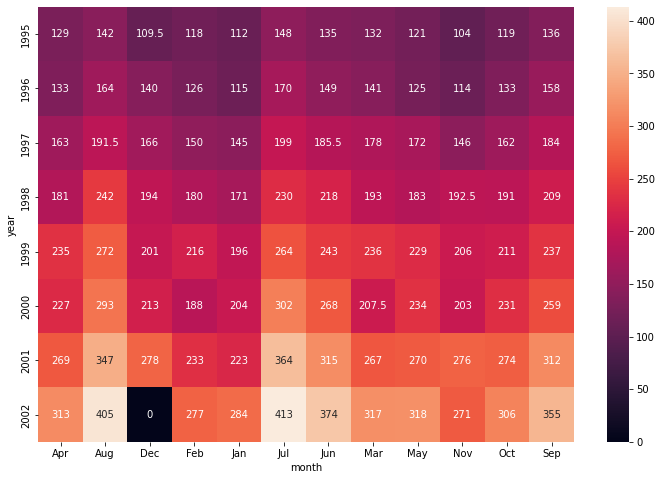

In [67]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")


<AxesSubplot: xlabel='year', ylabel='Passengers'>

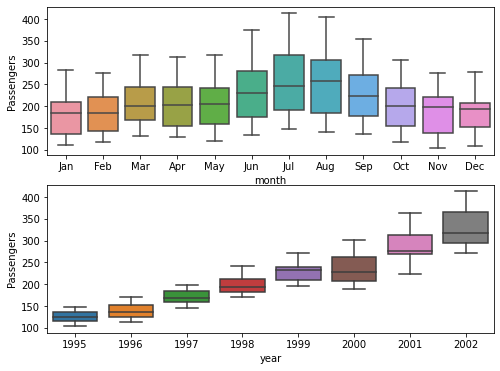

In [68]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)


<AxesSubplot: xlabel='year', ylabel='Passengers'>

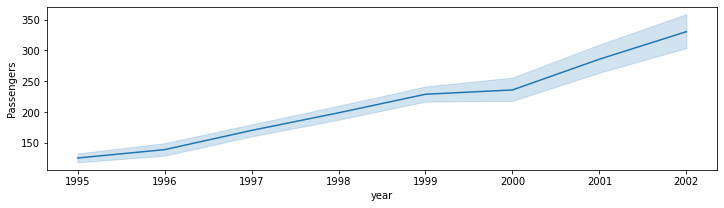

In [69]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)


# Forecasting Data Driven Model

Splitting data

In [70]:
Train = interpolated.head(81)
Test = interpolated.tail(14)

Moving Average

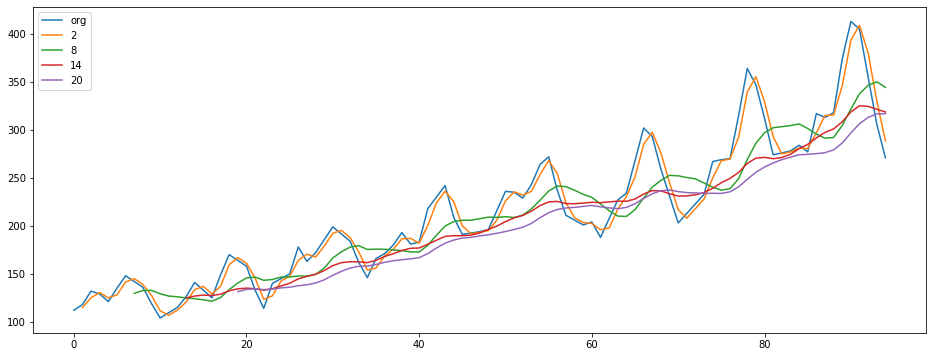

In [71]:
plt.figure(figsize=(16,6))
interpolated.Passengers.plot(label="org")
for i in range(2,24,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

plt.show()

Time series decomposition plot

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

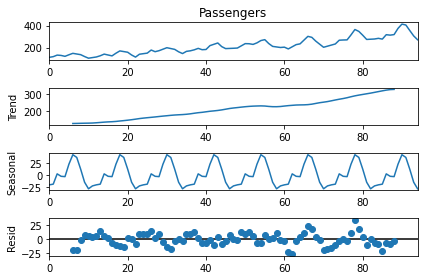

In [73]:
decompose_ts_add = seasonal_decompose(interpolated.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

ACF plots and PACF plots

In [74]:
import statsmodels.graphics.tsaplots as tsa_plots

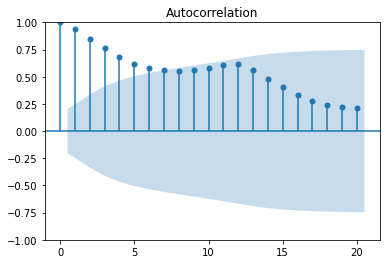

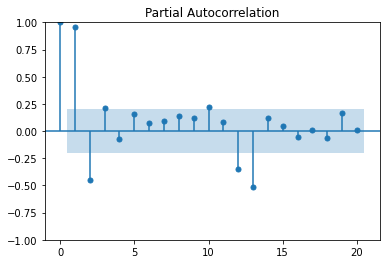

In [75]:

tsa_plots.plot_acf(interpolated.Passengers)
tsa_plots.plot_pacf(interpolated.Passengers)
plt.show()

Evaluation Metric MAPE

In [76]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

Simple Exponential Method

In [77]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [78]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

11.181638722453021

Holt method

In [79]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

12.424434193053463

Holts winter exponential smoothing with additive seasonality and additive trend

In [80]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

3.5137309781557966

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [81]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

3.8408252759975716

Final Model by combining train and test

In [82]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

Forecasting for next 20 time periods


In [83]:
hwe_model_add_add.forecast(20)

95     279.576893
96     284.794135
97     289.528491
98     312.437303
99     309.743936
100    309.984409
101    339.435046
102    364.731940
103    360.555698
104    334.762958
105    306.895493
106    292.607075
107    301.183965
108    306.401206
109    311.135562
110    334.044374
111    331.351007
112    331.591481
113    361.042118
114    386.339012
dtype: float64

# Forecasting Model Based Methods

In [84]:
Train = Airlines.head(81)
Test = Airlines.tail(14)

In [85]:
Train

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2001-05-31,270.0,77,5929,May,2001,0,0,0,0,1,0,0,0,0,0,0,0,5.598422
77,2001-06-30,315.0,78,6084,Jun,2001,0,0,0,0,0,1,0,0,0,0,0,0,5.752573
78,2001-07-31,364.0,79,6241,Jul,2001,0,0,0,0,0,0,1,0,0,0,0,0,5.897154
79,2001-08-31,347.0,80,6400,Aug,2001,0,0,0,0,0,0,0,1,0,0,0,0,5.849325


In [86]:
Test

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
81,2001-10-31,274.0,82,6724,Oct,2001,0,0,0,0,0,0,0,0,0,1,0,0,5.613128
82,2001-11-30,276.0,83,6889,Nov,2001,0,0,0,0,0,0,0,0,0,0,1,0,5.620401
83,2001-12-31,278.0,84,7056,Dec,2001,0,0,0,0,0,0,0,0,0,0,0,1,5.627621
84,2002-01-31,284.0,85,7225,Jan,2002,1,0,0,0,0,0,0,0,0,0,0,0,5.648974
85,2002-02-28,277.0,86,7396,Feb,2002,0,1,0,0,0,0,0,0,0,0,0,0,5.624018
86,2002-03-31,317.0,87,7569,Mar,2002,0,0,1,0,0,0,0,0,0,0,0,0,5.758902
87,2002-04-30,313.0,88,7744,Apr,2002,0,0,0,1,0,0,0,0,0,0,0,0,5.746203
88,2002-05-31,318.0,89,7921,May,2002,0,0,0,0,1,0,0,0,0,0,0,0,5.762051
89,2002-06-30,374.0,90,8100,Jun,2002,0,0,0,0,0,1,0,0,0,0,0,0,5.924256
90,2002-07-31,413.0,91,8281,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448


In [87]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()


In [88]:
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.87107195088723

In [89]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     297.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.61e-28
Time:                        17:41:11   Log-Likelihood:                -380.35
No. Observations:                  81   AIC:                             764.7
Df Residuals:                      79   BIC:                             769.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    104.5949      6.016     17.386      0.000      92.620     116.569
t              2.1991      0.127     17.253      0.000       1.945       2.453
==============================================================================
Omnibus:                        3.654   Durbin-Watson:                   0.479
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.873
Skew:                           0.388   Prob(JB):                        0.238
Kurtosis:                       3.499   Cond. No.                         95.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#Exponential

Exp = smf.ols('log_passengers ~ t',data=Train).fit()

In [91]:
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.37179623821829

In [92]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     372.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.29e-31
Time:                        17:41:11   Log-Likelihood:                 54.447
No. Observations:                  81   AIC:                            -104.9
Df Residuals:                      79   BIC:                            -100.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7583      0.028    169.575      0.000       4.702       4.814
t              0.0115      0.001     19.287      0.000       0.010       0.013
==============================================================================
Omnibus:                        2.843   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.026
Skew:                          -0.205   Prob(JB):                        0.363
Kurtosis:                       2.342   Cond. No.                         95.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()


In [94]:
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.70987042515199

In [95]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     153.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           8.80e-28
Time:                        17:41:12   Log-Likelihood:                -378.91
No. Observations:                  81   AIC:                             763.8
Df Residuals:                      78   BIC:                             771.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.0642      9.062     12.807      0.000      98.022     134.106
t              1.3700      0.510      2.686      0.009       0.355       2.386
t_sq           0.0101      0.006      1.677      0.097      -0.002       0.022
==============================================================================
Omnibus:                        1.088   Durbin-Watson:                   0.496
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.628
Skew:                           0.191   Prob(JB):                        0.731
Kurtosis:                       3.201   Cond. No.                     9.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()


In [97]:
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

130.55762388601406

In [98]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1.546
Date:                Tue, 13 Dec 2022   Prob (F-statistic):              0.135
Time:                        17:41:12   Log-Likelihood:                -434.68
No. Observations:                  81   AIC:                             893.4
Df Residuals:                      69   BIC:                             922.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.5833     22.916      7.444      0.000     124.867     216.299
Jan           -4.0119     31.229     -0.128      0.898     -66.312      58.288
Feb            2.4167     31.229      0.077      0.939     -59.884      64.717
Mar           22.9167     31.229      0.734      0.466     -39.384      85.217
Apr           20.4167     31.229      0.654      0.515     -41.884      82.717
May           19.9881     31.229      0.640      0.524     -42.312      82.288
Jun           45.6310     31.229      1.461      0.149     -16.669     107.931
Jul           68.9881     31.229      2.209      0.030       6.688     131.288
Aug           65.3452     31.229      2.092      0.040       3.045     127.645
Sep           42.9881     31.229      1.377      0.173     -19.312     105.288
Oct            3.9167     32.408      0.121      0.904     -60.735      68.569
Nov           -9.6667     32.408     -0.298      0.766     -74.319      54.985
==============================================================================
Omnibus:                        5.160   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                2.643
Skew:                           0.174   Prob(JB):                        0.267
Kurtosis:                       2.186   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()


In [100]:
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad


26.78537191152329

In [101]:
add_sea_Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     85.73
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.82e-36
Time:                        17:41:12   Log-Likelihood:                -327.38
No. Observations:                  81   AIC:                             682.8
Df Residuals:                      67   BIC:                             716.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.6433      8.163     10.859      0.000      72.350     104.936
t              1.6190      0.294      5.506      0.000       1.032       2.206
t_sq           0.0064      0.003      1.837      0.071      -0.001       0.013
Jan            5.6088      8.454      0.663      0.509     -11.266      22.484
Feb            9.9396      8.450      1.176      0.244      -6.926      26.806
Mar           28.3291      8.447      3.354      0.001      11.470      45.189
Apr           23.7058      8.444      2.807      0.007       6.851      40.561
May           21.1412      8.443      2.504      0.015       4.288      37.994
Jun           44.6352      8.443      5.287      0.000      27.783      61.488
Jul           65.8307      8.444      7.796      0.000      48.976      82.685
Aug           60.0135      8.446      7.105      0.000      43.155      76.872
Sep           35.4692      8.449      4.198      0.000      18.604      52.334
Oct            8.2016      8.745      0.938      0.352      -9.253      25.657
Nov           -7.5178      8.744     -0.860      0.393     -24.971       9.935
==============================================================================
Omnibus:                        1.985   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.374
Skew:                          -0.143   Prob(JB):                        0.503
Kurtosis:                       3.571   Cond. No.                     3.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()


In [103]:
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.28596175917122

In [104]:
Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.374
Date:                Tue, 13 Dec 2022   Prob (F-statistic):              0.205
Time:                        17:41:12   Log-Likelihood:                -8.0784
No. Observations:                  81   AIC:                             40.16
Df Residuals:                      69   BIC:                             68.89
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1137      0.118     43.243      0.000       4.878       5.350
Jan           -0.0301      0.161     -0.187      0.853      -0.352       0.291
Feb            0.0111      0.161      0.069      0.945      -0.310       0.333
Mar            0.1238      0.161      0.768      0.445      -0.198       0.445
Apr            0.1037      0.161      0.644      0.522      -0.218       0.425
May            0.0961      0.161      0.596      0.553      -0.225       0.418
Jun            0.2225      0.161      1.381      0.172      -0.099       0.544
Jul            0.3217      0.161      1.997      0.050       0.000       0.643
Aug            0.3056      0.161      1.896      0.062      -0.016       0.627
Sep            0.2150      0.161      1.334      0.187      -0.107       0.536
Oct            0.0203      0.167      0.121      0.904      -0.313       0.354
Nov           -0.0694      0.167     -0.415      0.679      -0.403       0.264
==============================================================================
Omnibus:                       33.199   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.839
Skew:                          -0.181   Prob(JB):                       0.0540
Kurtosis:                       1.736   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()


In [106]:
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea


13.188070730263936

In [107]:
Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.45e-42
Time:                        17:41:12   Log-Likelihood:                 113.59
No. Observations:                  81   AIC:                            -201.2
Df Residuals:                      68   BIC:                            -170.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6432      0.030    157.113      0.000       4.584       4.702
t              0.0112      0.000     36.104      0.000       0.011       0.012
Jan            0.0259      0.036      0.717      0.476      -0.046       0.098
Feb            0.0559      0.036      1.546      0.127      -0.016       0.128
Mar            0.1574      0.036      4.353      0.000       0.085       0.230
Apr            0.1261      0.036      3.488      0.001       0.054       0.198
May            0.1073      0.036      2.969      0.004       0.035       0.179
Jun            0.2225      0.036      6.156      0.000       0.150       0.295
Jul            0.3105      0.036      8.591      0.000       0.238       0.383
Aug            0.2832      0.036      7.833      0.000       0.211       0.355
Sep            0.1814      0.036      5.015      0.000       0.109       0.254
Oct            0.0427      0.038      1.137      0.259      -0.032       0.118
Nov           -0.0582      0.038     -1.552      0.125      -0.133       0.017
==============================================================================
Omnibus:                        1.593   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.023
Skew:                          -0.238   Prob(JB):                        0.600
Kurtosis:                       3.275   Cond. No.                         622.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
#Compareing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
6,rmse_Mult_add_sea,13.188071
4,rmse_add_sea_quad,26.785372
1,rmse_Exp,42.371796
2,rmse_Quad,42.709870
0,rmse_linear,47.871072
3,rmse_add_sea,130.557624
5,rmse_Mult_sea,137.285962


Arima Model

In [109]:
arima = pd.read_excel('Airlines+Data.xlsx',index_col=0)


In [110]:
arima

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


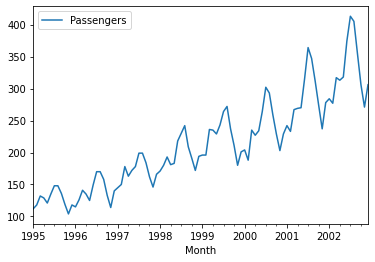

In [111]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
arima.plot()
pyplot.show()

array([[<AxesSubplot: title={'center': 'Passengers'}>]], dtype=object)

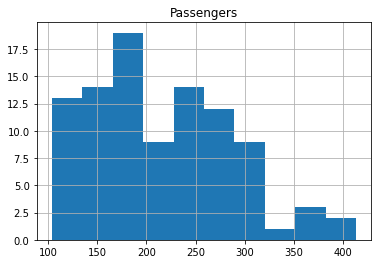

In [112]:
arima.hist()

In [113]:
# separate out a validation dataset
split_point = len(arima) - 10
dataset, validation = arima[0:split_point], arima[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


Persistence/ Base model

In [114]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [115]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

In [116]:
#Compareing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,13.188071
4,rmse_add_sea_quad,26.785372
1,rmse_Exp,42.371796
2,rmse_Quad,42.709870
0,rmse_linear,47.871072
3,rmse_add_sea,130.557624
5,rmse_Mult_sea,137.285962


# rmse_Mult_add_sea will be preffered